In [1]:
import numpy as np
import math as mt
import random
from matplotlib import pyplot as plt
from scipy import optimize
from IPython.display import clear_output
import matplotlib.mlab as mlab

In [2]:
def f(x):
    return mt.e**x

# crude MC

In [3]:
Integral = np.array([])
Vars = np.array([])

In [4]:
for j in range (1000):
    num = np.array([])
    v = 0
    
    for i in range (128):
        x = random.uniform(0,1)
        num = np.append(num, f(x))
        
    m = num.mean()
    Integral = np.append(Integral, m)
    
    for i in range (128):
        v = v + (num[i]-m)**2
    v = v/(128-1)
    v = v/128
    Vars = np.append(Vars, v)

In [5]:
Vars.mean()

0.001894339452920484

In [6]:
Integral.var()

0.0019422456308393502

In [7]:
Integral[0]

1.6565338028424623

In [8]:
(Integral[0]-Integral.mean())**2/1000

3.853732404091025e-06

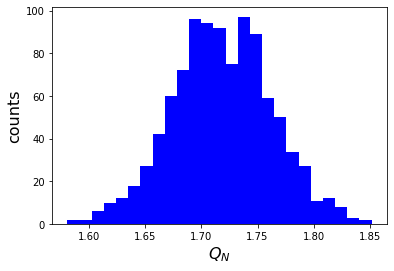

In [9]:
plt.hist(Integral, 25, color='blue')
plt.xlabel('$Q_N$', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.show()

In [10]:
IntegralMC = Integral

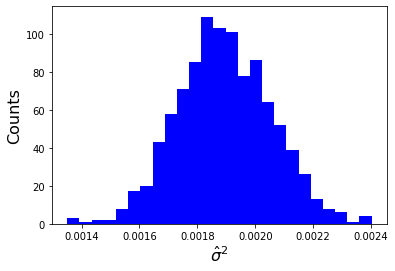

In [11]:
plt.hist(Vars, 25, color='blue')
plt.xlabel('$\hat{\sigma}^2$', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

In [12]:
m2 = np.mean(Integral)

In [13]:
i = 3
i += 3
i

6

In [14]:
somma = 0
for i in range (1000):
    somma += (Integral[i]-m2)**2

sigma_tilde = mt.sqrt(somma/999)
sigma_I = sigma_tilde/mt.sqrt(1000)

In [15]:
sigma_I

0.001394342074478142

In [16]:
sigma_tilde

0.04409296792755063

In [17]:
v2 = np.mean(Vars)
np.sqrt(v2)

0.04352401007398656

In [18]:

s2 = np.sqrt(v2/1000)
print(f'For crude MC with 128 samples we have:\n'
     f'\tmean\t= {round(m2,5)}\n\terr\t= {round(s2,5)}\n')

For crude MC with 128 samples we have:
	mean	= 1.71861
	err	= 0.00138



mean_s = np.array([])
var_s = np.array([])
val_s = np.array([])

Ns = np.arange(100, 2500, 200)
for Ni in Ns:
    Integral = np.array([])
    for j in range (1000):
        num = np.array([])
        for i in range (Ni):
            x = random.uniform(0,1)
            num = np.append(num, f(x))
        Integral = np.append(Integral, num.mean())
    mean_s = np.append(mean_s, Integral.mean())
    var_s = np.append(var_s, Integral.var())
    val_s = np.append(val_s, Integral[0])

plt.plot(Ns, np.sqrt(var_s), 'go', color='green')
plt.xlabel('N', fontsize=16)
plt.ylabel('$\sigma_I$', fontsize=16)
plt.show()

In [19]:
def test_func(x,a):
    return a / np.sqrt(x)

In [20]:
from scipy import optimize
from IPython.display import clear_output
import matplotlib.mlab as mlab

In [21]:
params, params_covariance = optimize.curve_fit(test_func, Ns, np.sqrt(var_s), p0=[2])

NameError: name 'Ns' is not defined

In [22]:
kappa = params[0]
print ('kappa = ', round(kappa,4))

err_kappa = np.sqrt(params_covariance[0][0])
print('err_kappa = ', round(err_kappa,4))

NameError: name 'params' is not defined

In [ ]:
params[0]

In [ ]:
ran = np.arange(100, 2500, 1)

plt.plot(Ns, np.sqrt(var_s), 'go', color='green')
plt.plot(ran, test_func(ran, params), color='red')
plt.xlabel('N', fontsize=16)
plt.ylabel('$\sigma_I$', fontsize=16)
plt.show()

# Stratified sampling

In this way, I choose to divide the domain in two intervals: [0, 0.5] and [0.5, 1].
Then, I compute the integral over the two domains, each one with his variance. Finally, the value of the integral on the complete domain will be the sum of the two integrals, and the variance will be the sum of variances:<br />

$$I=\frac{I_a}{2}+\frac{I_b}{2}$$ 

$$\sigma^2=\frac{\sigma^2_a}{4}+\frac{\sigma^2_b}{4}$$

So, the final error on the integral will be:

$$\sigma=\frac{1}{2}\sqrt{\sigma^2_a+\sigma^2_b}$$

Notice that each $\sigma$ will still go as $\frac{1}{\sqrt{N}}$, so will do the total one, but now the coefficient will be smaller

per calcolare la varianza, calcolo la media dei valori ottenuti da 1000 calcoli di integrali su 1000 diversi sample da 128 numeri

In [ ]:
Integral = np.array([])
Vars = np.array([])

for j in range (1000):
    num1 = np.array([])
    num2 = np.array([])
    va = 0
    vb = 0
    for i in range (64):
        x1 = random.uniform(0,1/2.)
        x2 = random.uniform(1/2.,1)
        num1 = np.append(num1, f(x1))
        num2 = np.append(num2, f(x2))
    ma = num1.mean()
    mb = num2.mean()
    Integral = np.append(Integral, 0.5*(ma+mb))
    for i in range (64):
        va = va + (num1[i] - ma)**2
        vb = vb + (num2[i] - mb)**2
    va = va / ((64-1)*64) 
    vb = vb / ((64-1)*64)
    
    Vars = np.append(Vars, 0.25*(va + vb))

In [ ]:
plt.hist(Integral, 25, color='blue')
plt.xlabel('$Q_{N}^{strat}$', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

In [ ]:
IntegralSS = Integral

In [ ]:
plt.hist(Vars, 25, color='blue')
plt.xlabel('$\hat{\sigma}^{2\,strat}$', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

In [ ]:
m3 = np.mean(Integral)
v3 = np.mean(Vars)
s3 = np.sqrt(v3)/np.sqrt(1000)

print(f'For Stratified Sampling MC we have:\n'
     f'\tmean\t= {round(m3,4)}\n\tstd dev\t= {round(s3,4)}\n')

In [ ]:
# Valuto ora il valore approssimato dell'integrale per diverse dimensioni dei sample
# che vanno da 100 a 2500 con step di 200

means3 = np.array([])
varns3 = np.array([])

Ns = np.arange(50, 1250, 100)
for N in Ns:
    Integral = np.array([])
    Vars = np.array([])

    for j in range (1000):
        num1 = np.array([])
        num2 = np.array([])
        v1 = 0
        v2 = 0
        for i in range (N):
            x1 = random.uniform(0,1/2.)
            x2 = random.uniform(1/2.,1)
            # store the evaluated integrands in the lists
            num1 = np.append(num1, f(x1))
            num2 = np.append(num2, f(x2))
        m1 = num1.mean()
        m2 = num2.mean()
        Integral = np.append(Integral, 0.5*(m1+m2))
        for i in range (N):
            v1 = v1 + (num1[i] - m1)**2
            v2 = v2 + (num2[i] - m2)**2
        v1 = v1 / ((N-1)*N) #variances for the two computations
        v2 = v2 / ((N-1)*N)
    
        Vars = np.append(Vars, 0.25*(v1 + v2))
    
    means3 = np.append(means3, Integral.mean())
    varns3 = np.append(varns3, Vars.mean())

In [ ]:
params, params_covariance = optimize.curve_fit(test_func, Ns*2, np.sqrt(varns3), p0=[2])

ran = np.arange(100, 2500, 1)

plt.plot(Ns*2, np.sqrt(varns3), 'go', color='green')
plt.plot(ran, test_func(ran, params), color='red')
plt.ylabel('$\sigma_I$', fontsize=16)
plt.xlabel('N', fontsize=16)
plt.show()

print(params)
print(np.sqrt(params_covariance))

# Importance sampling

This method is the most powerful, among those shown here, in reducing the variance.
The concept is simple: instead of extracting numbers from a uniform distribution, we extract them from a distribution that is similar to the function which integral we want to compute. 
The mathematical concept is a simple change of variable:
$$I=\int_a^bf(x)dx=\int_a^b\frac{f(x)}{w(x)}w(x)dx$$
Where $w(x)$ is the sampling distribution.
Hence, if $w(x)$ is normalized in the interval [a, b], we can just extract N numbers $x_i$ under this distribution and evaluate the integral using the following estimator:
$$I_N=\frac{1}{N}\sum_{i=0}^N\frac{f(x_i)}{w(x_i)}$$

## How to extract numbers under a generical distribution?

We will use the **inverse function method**. 
If we want to extract numbers following the distrution $w(x)$, we need first to compute the cumulative function of $w$:
$$W(x)=\int_0^xw(t)dt$$
and to invert it. Now, if we extract uniform random numbers $x_i$ in the interval [a, b], taking $W^{-1}(x_i)$ we find numbers distributed as $w(x)$

In [6]:
# definisco il generatore di due funzioni di sampling con il metodo della funzione inversa
def s1 ():
    'genera con distribuzione 1/e+2(e-1)/e*x'
    x=random.uniform(0, 1)
    # pdf(x) = 1/e+2(e-1)/e*x -> 
    # cum.function PDF(x) = int0_x pdf(x)dx = x/e + (1-1/e)x^2 ->
    # inverse (1 - sqrt(4xe^2 - 4ex + 1))/(2 - 2e)
    return (1 - np.sqrt(4*x*np.e**2 - 4*np.e*x + 1)/(2 - 2*np.e))

def w1 (x):
    return ((1+2*(np.e-1)*x)/np.e)

def w2 (x):
    return ((2.5+2.5*(np.e-1)*x**1.5)/(np.e+1.5))

def s2 ():
    'genera con distribuzione (1+3(e-1)*x^2)/e'
    #troppo difficile invertire: uso un altro metodo
    while(0==0):
        x=random.uniform(0, 1)
        y=random.uniform(0, np.e)
        if (y<w2(x)):    return x
        

In [7]:
# costruisco un loop con queste istruzioni

Integral = np.array([])
Vars = np.array([])

for j in range (1000):
    num = np.array([])
    v = 0
    i = 0
    for i in range (128):
        x = s1()
        # store the number in the list
        num = np.append(num, f(x)/w1(x))
    m = num.mean()
    Integral = np.append(Integral, m)
    for i in range (128):
        v = v + (num[i] - m)**2
    v = v/((128-1)*128)
    Vars = np.append(Vars, v)

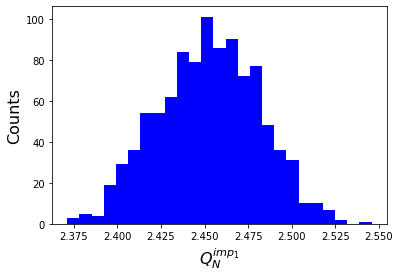

In [8]:
# Plot of the gaussian behaviour of the single computations over each sample
# note that this is narrower than the previous ones
plt.hist(Integral, 25, color='blue')
plt.xlabel('$Q_{N}^{imp_1}$', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

In [9]:
IntegralIS1 = Integral

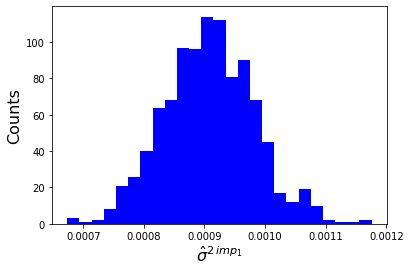

In [10]:

plt.hist(Vars, 25, color='blue')
plt.xlabel('$\hat{\sigma}^{2\,imp_1}$', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

In [11]:
m4 = np.mean(Integral)
v4 = np.mean(Vars)

In [12]:
print(f'For Importance Sampling MC we have:\n'
     f'\tmean\t= {m4}\n\tstd dev\t= {np.sqrt(v4)/np.sqrt(1000)}\n')

For Importance Sampling MC we have:
	mean	= 2.4524337188162573
	std dev	= 0.0009529208907769393



In [63]:
# costruisco un loop con queste istruzioni

Integral = np.array([])
Vars = np.array([])

for j in range (1000):
    num = np.array([])
    v = 0
    i = 0
    for i in range (128):
        x = s2()
        # store the number in the list
        num = np.append(num, f(x)/w2(x))
    m = num.mean()
    Integral = np.append(Integral, m)
    for i in range (128):
        v = v + (num[i] - m)**2
    v = v/((128-1)*128)
    Vars = np.append(Vars, v)
    

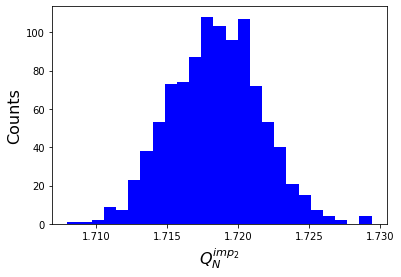

In [64]:
# Plot of the gaussian behaviour of the single computations over each sample
# note that this is narrower than the previous ones

# Plot of the gaussian behaviour of the single computations over each sample
# note that this is narrower than the previous ones
plt.hist(Integral, 25, color='blue')
plt.xlabel('$Q_{N}^{imp_2}$', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

In [65]:
IntegralIS2 = Integral

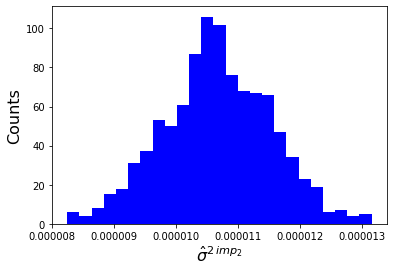

In [66]:
plt.hist(Vars, 25, color='blue')
plt.xlabel('$\hat{\sigma}^{2\,imp_2}$', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

In [67]:
m5 = np.mean(Integral)
v5 = np.mean(Vars)

In [68]:
print(f'For Importance Sampling MC we have:\n'
     f'\tmean\t= {m5}\n\tvar\t= {np.sqrt(v5)/np.sqrt(1000)}\n')

For Importance Sampling MC we have:
	mean	= 1.718436982038282
	var	= 0.0001032954777550306



In [69]:
# Valuto ora il valore approssimato dell'integrale per diverse dimensioni dei sample
# che vanno da 100 a 2500 con step di 200

means4 = np.array([])
varns4 = np.array([])

Ns = np.arange(100, 2500, 200)
for N in Ns:
    Integral = np.array([])
    Vars = np.array([])

    for j in range (1000):
        num = np.array([])
        v = 0
        i = 0
        for i in range (N):
            x = s1()
            # store the number in the list
            num = np.append(num, f(x)/w1(x))
        m = num.mean()
        Integral = np.append(Integral, m)
        for i in range (N):
            v = v + (num[i] - m)**2
        v = v/((N-1)*N)
        Vars = np.append(Vars, v)
    means4 = np.append(means4, Integral.mean())
    varns4 = np.append(varns4, Vars.mean())
    print(len(means4))


1
2


KeyboardInterrupt: 

In [ ]:
params, params_covariance = optimize.curve_fit(test_func, Ns, np.sqrt(varns4), p0=[2])
ran = np.arange(100, 2500, 1)

plt.plot(Ns, np.sqrt(varns4), 'go', color = 'green')
plt.plot(ran, test_func(ran, params), color='red')
plt.ylabel('$\sigma_I^{imp_1}$', fontsize=16)
plt.xlabel('N', fontsize=16)
plt.show()

print(params)
print(np.sqrt(params_covariance))

In [ ]:
# Valuto ora il valore approssimato dell'integrale per diverse dimensioni dei sample
# che vanno da 100 a 2500 con step di 200

means5 = np.array([])
varns5 = np.array([])

Ns = np.arange(100, 2500, 200)
for N in Ns:
    Integral = np.array([])
    Vars = np.array([])

    for j in range (1000):
        num = np.array([])
        v = 0
        i = 0
        for i in range (N):
            x = s2()
            # store the number in the list
            num = np.append(num, f(x)/w2(x))
        m = num.mean()
        Integral = np.append(Integral, m)
        for i in range (N):
            v = v + (num[i] - m)**2
        v = v/((N-1)*N)
        Vars = np.append(Vars, v)
    means5 = np.append(means5, Integral.mean())
    varns5 = np.append(varns5, Integral.var())
    print(len(means5))


In [ ]:
params, params_covariance = optimize.curve_fit(test_func, Ns, np.sqrt(varns5),
                                               p0=[2])
ran = np.arange(100, 2500, 1)

plt.plot(Ns, np.sqrt(varns5), 'go', color='green')
plt.plot(ran, test_func(ran, params), color='red')
plt.ylabel('$\sigma_I^{imp_2}$', fontsize=16)
plt.xlabel('N', fontsize=16)
plt.show()


print(params)
print(np.sqrt(params_covariance))

# Error comparison

Here I plot the behaviour of the variances and the standard deviations for the various methods of integration.
We can see that they thend to converge to zero faster as we go towards the importance sampling method

In [ ]:
Ns = np.arange(100, 2500, 200)

In [ ]:
plt.plot(Ns, np.sqrt(var_s), 'bo', label='Crude MC')
plt.plot(Ns, np.sqrt(varns3), 'go', label='Stratified Sampling')
plt.plot(Ns, np.sqrt(varns4), 'ro', label='Importance Sampling $w_1$')
plt.plot(Ns, np.sqrt(varns5), 'yo', label='Importance Sampling $w_2$')
plt.xlabel('$N$', fontsize=16)
plt.ylabel('$\sigma_{I}$', fontsize=16)
plt.legend()
plt.show()

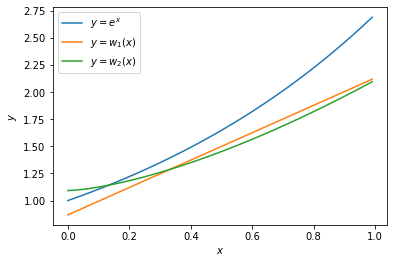

In [41]:
xx = np.arange(0, 1, 0.01)

plt.plot(xx, f(xx), label='$y=e^x$')
plt.plot(xx, w1(xx)+0.5, label='$y=w_1(x)$')
plt.plot(xx, w2(xx)+0.5, label='$y=w_2(x)$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [ ]:
x = list(['Crude MC', 'Stratified\nsampling', 'Importance\nsampling\n$w_1$', 'Importance\nsampling\n$w_2$'])
y = list([1.7190, 1.7179, 1.7181, 1.7182])
err = list ( [0.0014, np.sqrt(v3)/np.sqrt(1000), np.sqrt(v4)/np.sqrt(1000), np.sqrt(v5)/np.sqrt(1000)])
plt.errorbar(x, y, yerr=err, fmt='s', color = 'blue')
plt.plot((0,1,2,3),(1.7183, 1.7183, 1.7183, 1.7183), color='red', linestyle='--')
plt.ylabel('$I$', fontsize=16)
plt.show()

In [ ]:
x = list(['Crude MC', 'Stratified\nsampling', 'Importance\nsampling\n$w_1$', 'Importance\nsampling\n$w_2$'])
y = list([0.485, 0.254, 0.198, 0.037])
err = list ([0.3, 0.12, 0.02, 0.02])
plt.errorbar(x, y, yerr=err, fmt='s', color = 'blue')
plt.ylabel('$\kappa$', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
plt.hist(IntegralMC, 25, color='blue', histtype='step', label='Crude MC', linewidth=1.5)
plt.hist(IntegralSS, 25, color='green', histtype='step', label='Stratified Sampling', linewidth=1.5)
plt.hist(IntegralIS1, 25, color='red', histtype='step', label='Importance Sampling $w_1$', linewidth=1.5)
plt.hist(IntegralIS2, 25, color='orange', histtype='step', label='Importance Sampling $w_2$', linewidth=1.5)
plt.xlabel('$Q_{N}$', fontsize=16)
plt.ylabel('Counts', fontsize=16)

plt.legend(fontsize=16)
plt.show()

# alpha

In [ ]:
import numpy as np
import math as mt
import random
from matplotlib import pyplot as plt
from scipy import optimize
from IPython.display import clear_output
import matplotlib.mlab as mlab

In [ ]:
x = list(['ML', 'LS'])

alpha = list([0.651,0.623])
alpha_err = list([0.003, 0.003])
plt.plot((0,1),(0.65, 0.65), color='black', linestyle='--')
plt.errorbar(x, alpha, yerr=alpha_err, fmt='s', color = 'red')
plt.ylabel('α', fontsize=16)
plt.xticks(fontsize=16)
plt.show()

In [ ]:
x = list(['ML', 'LS'])

beta = list([0.059,0.057])
beta_err = list([0.003, 0.003])
plt.errorbar(x, beta, yerr=beta_err, fmt='s', color = 'green')
plt.plot((0,1),(0.06, 0.06), color='black', linestyle='--')
plt.ylabel('β', fontsize=16)
plt.xticks(fontsize=16)
plt.show()

In [ ]:
x = list(['ML', 'LS'])

gamma = list([-0.178,-0.162])
gamma_err = list([0.002, 0.002])
plt.errorbar(x, gamma, yerr=gamma_err, fmt='s', color = 'blue')
plt.plot((0,1),(-0.18, -0.18), color='black', linestyle='--')
plt.ylabel('$\gamma$', fontsize=16)
plt.xticks(fontsize=16)
plt.show()